### Importing Model

In [2]:
import tensorflow as tf
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np
import os

C:\Users\KIIT\AppData\Local\Temp\ipykernel_4592\1282811684.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [26]:
model = tf.keras.models.load_model('4_class_improved.keras')

In [27]:
model

<Sequential name=sequential_1, built=True>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Image row_10.png belongs to the Standard class


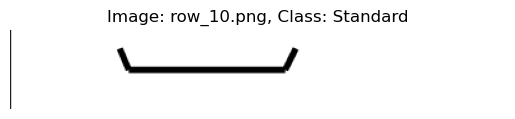

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Image row_11.png belongs to the Standard class


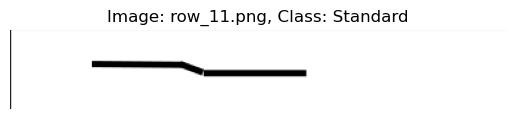

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Image row_12.png belongs to the Standard class


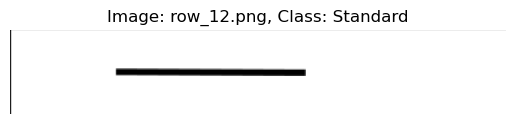

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Image row_13.png belongs to the Standard class


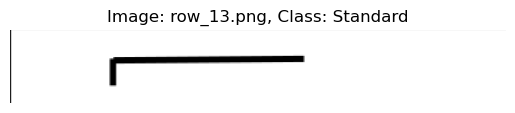

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Image row_14.png belongs to the Standard class


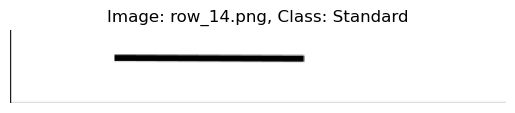

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Image row_15.png belongs to the Standard class


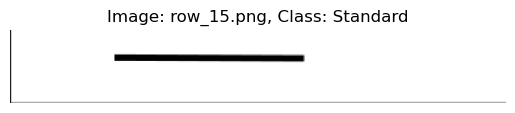

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Image row_16.png belongs to the Standard class


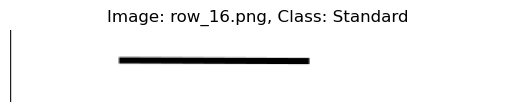

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image row_17.png belongs to the Standard class


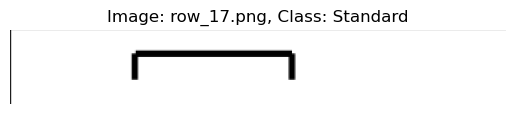

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Image row_18.png belongs to the Standard class


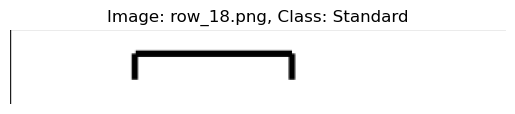

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Image row_19.png belongs to the Standard class


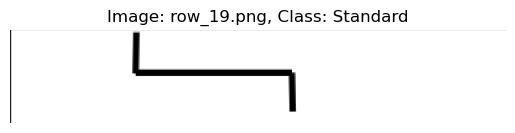

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Image row_20.png belongs to the Standard class


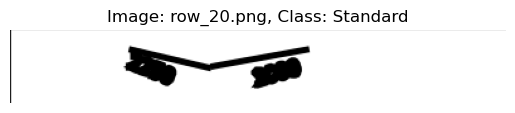

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Image row_21.png belongs to the Standard class


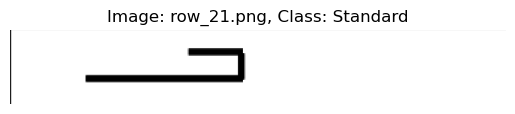

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Image row_22.png belongs to the Standard class


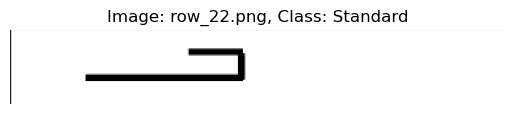

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Image row_23.png belongs to the Standard class


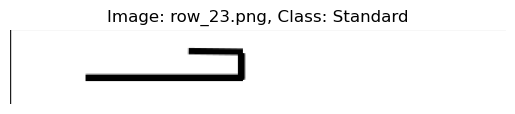

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Image row_24.png belongs to the Standard class


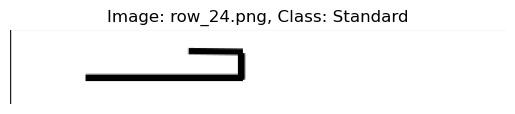

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Image row_25.png belongs to the Standard class


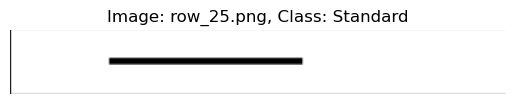

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Image row_26.png belongs to the Standard class


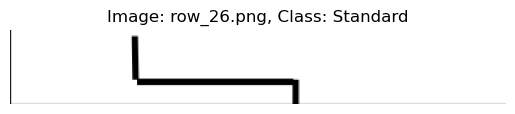

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Image row_27.png belongs to the Standard class


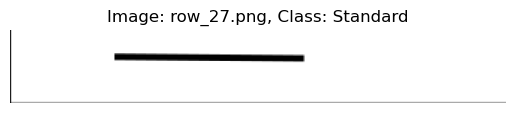

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Image row_28.png belongs to the Standard class


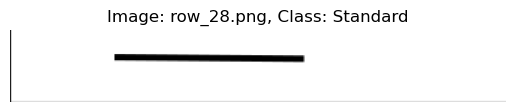

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image row_29.png belongs to the Standard class


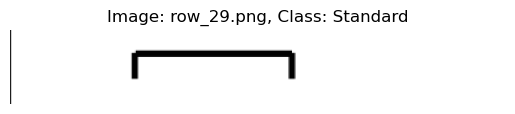

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Image row_3.png belongs to the Intersecting class


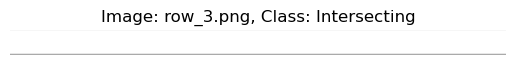

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Image row_30.png belongs to the Standard class


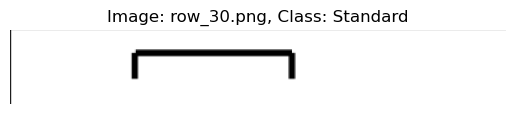

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Image row_31.png belongs to the Overlapping class


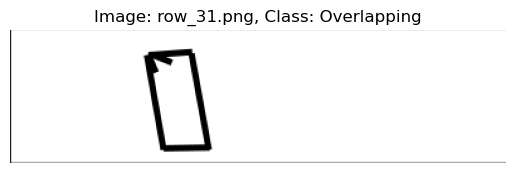

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Image row_32.png belongs to the Overlapping class


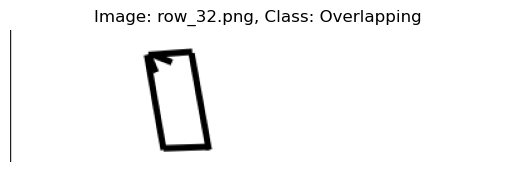

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Image row_33.png belongs to the Overlapping class


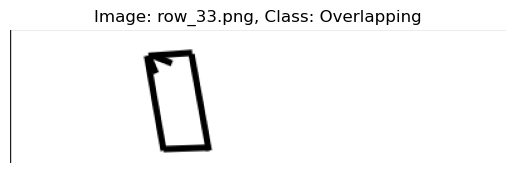

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Image row_34.png belongs to the Standard class


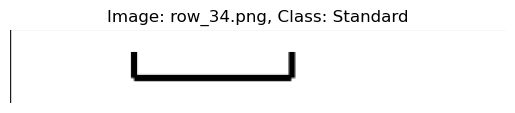

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Image row_35.png belongs to the Standard class


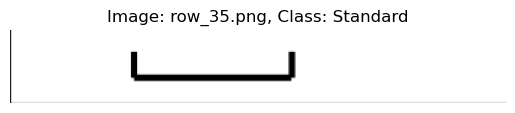

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Image row_36.png belongs to the Standard class


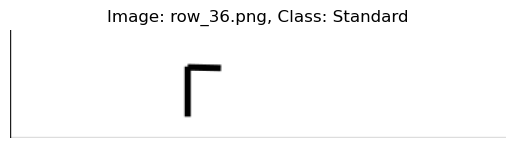

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Image row_37.png belongs to the Standard class


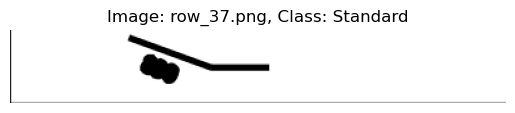

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Image row_38.png belongs to the Standard class


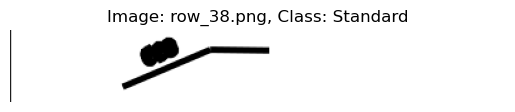

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Image row_39.png belongs to the Standard class


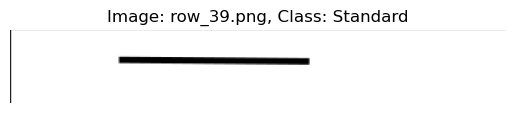

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Image row_4.png belongs to the Intersecting class


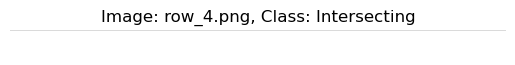

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Image row_40.png belongs to the Standard class


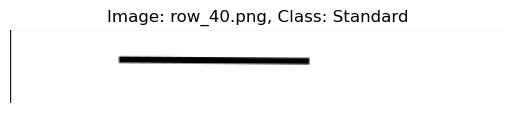

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Image row_41.png belongs to the Standard class


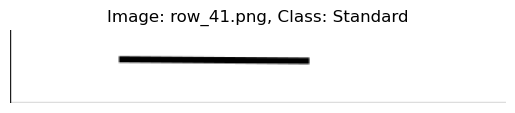

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image row_42.png belongs to the Standard class


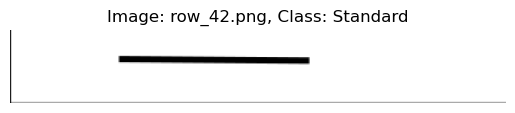

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Image row_43.png belongs to the Standard class


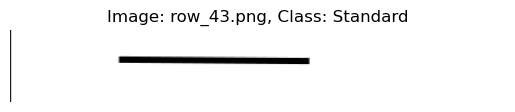

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Image row_44.png belongs to the Standard class


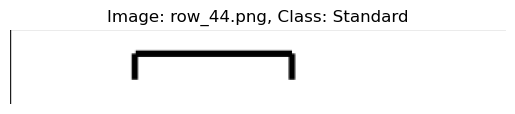

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Image row_45.png belongs to the Standard class


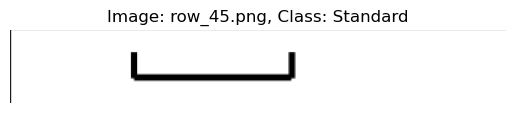

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Image row_46.png belongs to the Standard class


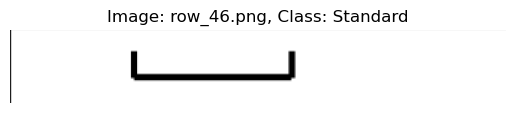

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Image row_47.png belongs to the Standard class


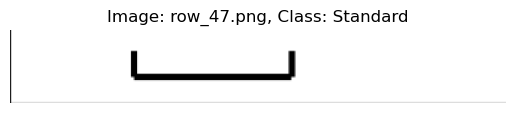

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Image row_48.png belongs to the Standard class


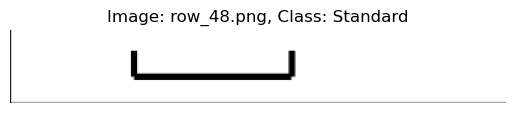

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Image row_5.png belongs to the Standard class


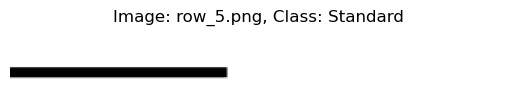

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Image row_6.png belongs to the Intersecting class


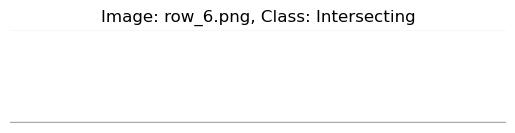

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Image row_7.png belongs to the Standard class


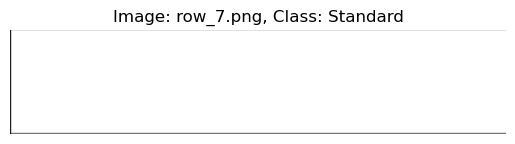

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Image row_8.png belongs to the Intersecting class


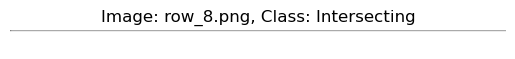

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Image row_9.png belongs to the Intersecting class


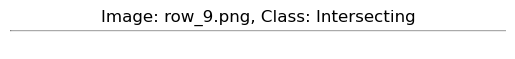

In [38]:
import os

# Define the directory containing the images
image_dir = 'Shapes'

# Iterate over all files in the directory
for filename in os.listdir(image_dir):
    if imghdr.what(os.path.join(image_dir, filename)) is not None:  # Check if the file is an image
        # Load and preprocess the image
        img = cv2.imread(os.path.join(image_dir, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        resize = tf.image.resize(img, (256, 256))

        # Predict the class
        predict = model.predict(np.expand_dims(resize / 255, 0))
        class_names = ['Circular', 'Intersecting', 'Standard', 'Overlapping']
        predicted_class = np.argmax(predict)

        print(f'Image {filename} belongs to the {class_names[predicted_class]} class')

        # Plot the image with its class prediction
        plt.imshow(img)
        plt.title(f'Image: {filename}, Class: {class_names[predicted_class]}')
        plt.axis('off')
        plt.show()

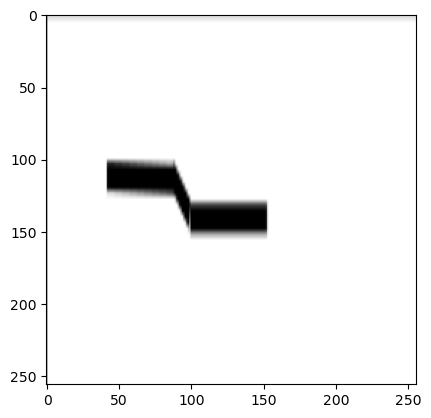

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Image belong to the Standard class


In [29]:
# Load and preprocess the image
img = cv2.imread('Shapes/row_11.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

# Predict the class
predict = model.predict(np.expand_dims(resize/255, 0))

class_names = ['Circular', 'Intersecting', 'Standard', 'Overlapping']
predicted_class = np.argmax(predict)

print(f'Image belong to the {class_names[predicted_class]} class')

### Bend Detection

In [18]:
model = tf.keras.models.load_model('imageclassifier_4.keras')
model

<Sequential name=sequential_6, built=True>

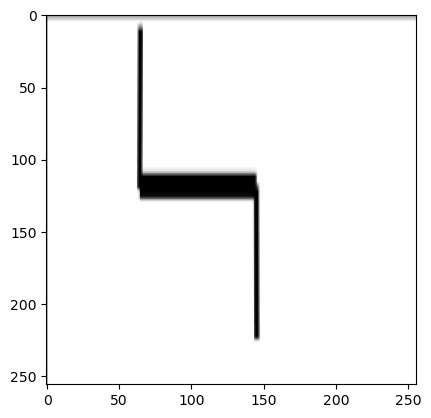

In [19]:
# Load and preprocess the image
img = cv2.imread('row_19.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [20]:
# Predict the class
predict = model.predict(np.expand_dims(resize / 255, 0))

class_names = ['Circular', 'Intersecting', 'Normal', 'Overlapping']
predicted_class = np.argmax(predict)

print(f'Image belong to the {class_names[predicted_class]} class')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Image belong to the Normal class


In [23]:
### Bend Detection
# Define separate functions for each class
def detect_bend_circular(img):
    # Bend detection code specific to the Circular class
    print("Running bend detection for Circular class...")
    # Read and convert the image to grayscale
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Thresholding to isolate the cable (adjust thresholds as needed)
    _, thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)  # Adjust the lower threshold value

    # Morphological operations to enhance the bends
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  # Rectangular kernel
    dilated = cv2.dilate(thresh, kernel, iterations=2)  # More iterations for stronger dilation
    eroded = cv2.erode(dilated, kernel, iterations=1)

    # Apply Gaussian blur to smooth out the edges
    # blurred = cv2.GaussianBlur(eroded, (5, 5), 0)

    # Find contours and hierarchy
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    # More flexible contour filtering based on hierarchy
    filtered_contours = []
    for i, contour in enumerate(contours):
        # Check if contour is not the outermost (hierarchy level 0)
        if hierarchy[0][i][3] != -1:
            area = cv2.contourArea(contour)
            # Only keep contours within a reasonable area range to filter out noise
            if 10 < area < 610:  # Adjust these thresholds as needed
                filtered_contours.append(contour)

    print('Number of bends found: ', len(filtered_contours))

    # Draw remaining contours on the RGB version of the original image
    contour_image = image_rgb.copy()
    cv2.drawContours(contour_image, filtered_contours, -1, (255, 0, 0), 2)

    # Plot the final image with contours
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
    plt.title('Image with Contours')
    plt.axis('off')
    plt.show()


def detect_bend_intersecting():
    # Bend detection code specific to the Intersecting class
    print("Running bend detection for Intersecting class...")
    # Add your bend detection code here
    #...


def detect_bend_normal(img):
    # Bend detection code specific to the Normal class
    print("Running bend detection for Normal class...")
    # Add your bend detection code here
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply Laplacian edge detection
lap = cv2.Laplacian(img, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))

# Contour detection
contours, hierarchy = cv2.findContours(lap, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Remove small objects by calculating the perimeter
perimeter_threshold = 60  # Adjust this threshold as needed
filtered_contours = [cnt for cnt in contours if cv2.arcLength(cnt, True) > perimeter_threshold]

# Draw contours on a white background
white_background = np.ones_like(img) * 255
contour_image = cv2.drawContours(white_background, filtered_contours, -1, (0, 0, 0), 2)

# Threshold
threshold_value = 36
_, thresh = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Invert the mask to create a mask for numbers
mask = cv2.bitwise_not(thresh)

# Use Shi-Tomasi corner detection
corners = cv2.goodFeaturesToTrack(mask, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)

# Draw corners on the mask image
mask_with_corners = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(mask_with_corners, (x, y), 3, (0, 0, 255), -1)

# Count the number of corners detected and calculate the number of bends
num_corners = len(corners)
num_bends = num_corners -2 # Subtract 3 from the number of corners
    #...


def detect_bend_overlapping():
    # Bend detection code specific to the Overlapping class
    print("Running bend detection for Overlapping class...")
    # Add your bend detection code here
    #...
    
# Call the corresponding function based on the predicted class
if predicted_class == 0:
    detect_bend_circular(img)
elif predicted_class == 1:
    detect_bend_intersecting()
elif predicted_class == 2:
    detect_bend_normal(img)
elif predicted_class == 3:
    detect_bend_overlapping()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\contours_new.cpp:330: error: (-2:Unspecified error) in function 'class std::shared_ptr<struct ContourScanner_> __cdecl ContourScanner_::create(class cv::Mat,int,int,class cv::Point_<int>)'
> Modes other than RETR_FLOODFILL and RETR_CCOMP support only CV_8UC1 images (expected: 'img.type() == CV_8UC1'), where
>     'img.type()' is 16 (CV_8UC3)
> must be equal to
>     'CV_8UC1' is 0 (CV_8UC1)
